In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd

In [26]:
import datetime as dt

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [28]:
engine = create_engine("sqlite:///Resources/Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# determine the last date

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_date

# one year ago date

one_year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=364)

one_year_ago

datetime.date(2016, 8, 24)

In [83]:
# Perform a query to retrieve the data and precipitation scores

# list all of the column names and types

inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
# retreieve the data and precipitation scores

dates = session.query(Measurement).\
    filter(Measurement.date >= '2016-08-24', Measurement.date <= '2017-08-23')
# for date in dates:
    # print(date.date, date.prcp)

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [84]:
# Save the query results as a Pandas DataFrame and set the index to the date column

stmt = session.query(Measurement).\
    filter(Measurement.date >= '2016-08-24', Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).statement
prcp_df = pd.read_sql_query(stmt, session.bind)
prcp_df



,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,5092,USC00513117,2016-08-24,2.15,76.0
2,7332,USC00514830,2016-08-24,2.28,80.0
3,8826,USC00517948,2016-08-24,NaN,78.0
4,11852,USC00519523,2016-08-24,1.22,79.0
...,...,...,...,...,...
2218,19549,USC00516128,2017-08-22,0.50,76.0
2219,2724,USC00519397,2017-08-23,0.00,81.0
2220,7635,USC00514830,2017-08-23,0.00,82.0
2221,12187,USC00519523,2017-08-23,0.08,82.0


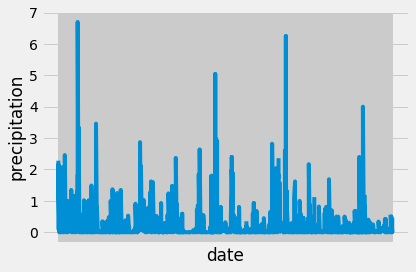

In [85]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(prcp_df['date'], prcp_df['prcp'])
plt.xlabel("date")
plt.ylabel("precipitation")
plt.tick_params(labelbottom=False)
plt.tight_layout()
plt.show()

In [86]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [90]:
# Station Analysis
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station).count()
print(f'There are {stations} stations.')

There are 9 stations.


In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
active_stations = engine.execute('SELECT station, count(station) FROM measurement GROUP BY station ORDER BY count(station) desc').fetchall()

active_stations

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [107]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# tobs = temp, use min, max, and avg

most_active_station = engine.execute('SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement where station = "USC00519281"').fetchall()

most_active_station

[(54.0, 85.0, 71.66378066378067)]

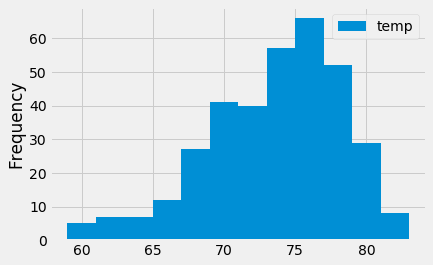

In [122]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_obs = engine.execute('SELECT date, tobs FROM measurement WHERE station = "USC00519281" AND date >= "2016-08-24" AND date <= "2017-08-23"').fetchall()

highest_obs

highest_obs_df = pd.DataFrame(highest_obs)

highest_obs_df = highest_obs_df.rename(columns={0: 'date', 1: 'temp'})

highest_obs_df.head()

highest_obs_df.plot.hist(bins=12)
plt.show()